## Import libraries

In [9]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import scipy
from scipy.spatial.distance import pdist, squareform
from pacBayesianDendogramCut import DendrogramCut
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:90% !important; }</style>"))

In [10]:
temp = scipy.io.loadmat('../../multilink/data/ticktoe.mat')
X = temp["X"].tolist()                                 # X = temp.X;
G = temp["G"]    

In [11]:
X = zip(X[0],X[1])
X = list(X)
X = list(map( lambda x: [x[0], x[1]]  ,X))
X = np.asarray(X)

## Generate dataset for clustering

In [12]:
centers = np.asarray([[-6.8, -7.3], [5, 2.5], [5, -2.5]])
samples = np.asarray([4, 1, 1]) * 50

'''X2, Z, C = sklearn.datasets.make_blobs(
    samples,
    cluster_std=[2, 1, 1],
    centers=centers,
    return_centers=True)'''
dist = pdist(X)
dist = squareform(dist)

## Plot the generated dataset

C:\Users\allem\AppData\Local\Temp/ipykernel_21892/1025274349.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



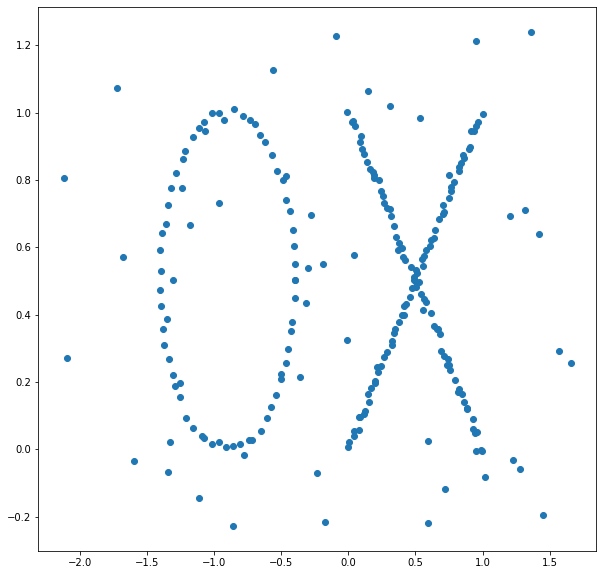

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1])
#ax.scatter(C[:, 0], C[:, 1])
fig.show()

## Compute the dynamic cut with the pacBayesian algorithm and plot the results

In [17]:
linkage2

,0,1,2
0,121,180,0.000442
1,113,114,0.011001
2,42,43,0.015096
3,119,120,0.022559
4,8,199,0.034158
...,...,...,...
224,453,454,0.906722
225,451,455,0.908683
226,439,456,0.918897
227,423,457,0.947910


In [14]:
linkage2 = pd.read_excel(r"C:\Users\allem\Desktop\IACV-Project\data\dendogram_multilink_full.xlsx", header=None)
model = DendrogramCut(k_max=230, method='average').fit(dist, linkage2)
k = model.pac_bayesian_cut()
print(k)
model.dendrogram_plot(k=k)

1


c:\Users\allem\Desktop\IACV-Project\src\pacBayesianDendogramCut.py:177: RuntimeWarning:

invalid value encountered in long_scalars



['C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C1',
 'C1',
 'C1',
 'C1',
 'C2',
 'C3',
 'C3',
 'C3',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C5',
 'C5',
 'C5',
 'C5',
 'C5',
 'C5',
 'C5',
 'C5',
 'C5',
 'C5',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C0',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',
 'C7',

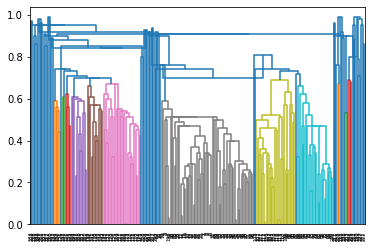

In [15]:
from scipy.cluster.hierarchy import dendrogram


dendrogram(model.linkage)['color_list']

In [16]:
model.linkage

array([[1.20e+02, 1.79e+02, 0.00e+00, 2.00e+00],
       [1.12e+02, 1.13e+02, 1.00e-02, 2.00e+00],
       [4.10e+01, 4.20e+01, 2.00e-02, 2.00e+00],
       [1.18e+02, 1.19e+02, 2.00e-02, 2.00e+00],
       [7.00e+00, 1.98e+02, 3.00e-02, 2.00e+00],
       [1.10e+01, 1.20e+01, 4.00e-02, 2.00e+00],
       [4.90e+01, 5.00e+01, 7.00e-02, 2.00e+00],
       [5.60e+01, 5.70e+01, 9.00e-02, 2.00e+00],
       [5.00e+00, 6.00e+00, 9.00e-02, 2.00e+00],
       [2.00e+01, 2.10e+01, 9.00e-02, 2.00e+00],
       [6.10e+01, 6.20e+01, 1.00e-01, 2.00e+00],
       [7.00e+01, 7.20e+01, 1.20e-01, 2.00e+00],
       [7.40e+01, 7.50e+01, 1.60e-01, 2.00e+00],
       [1.30e+01, 1.50e+01, 1.70e-01, 2.00e+00],
       [5.20e+01, 2.36e+02, 1.70e-01, 2.00e+00],
       [1.05e+02, 1.06e+02, 1.80e-01, 2.00e+00],
       [5.80e+01, 2.37e+02, 1.80e-01, 2.00e+00],
       [3.40e+01, 3.50e+01, 1.90e-01, 2.00e+00],
       [2.35e+02, 2.43e+02, 1.90e-01, 2.00e+00],
       [4.50e+01, 4.70e+01, 2.00e-01, 2.00e+00],
       [7.10e+01, 2.